In [ ]:
#------------------------------
import numpy as np 
import pandas as pd
import tensorflow as tf
from matplotlib import pylab
from bs4 import BeautifulSoup 
from functools import reduce
from sklearn.manifold import TSNE
from IPython.display import display

In [ ]:
biology_pd = pd.read_csv('biology.csv')
cooking_pd = pd.read_csv('cooking.csv')
crypto_pd = pd.read_csv('crypto.csv')
robotics_pd = pd.read_csv('robotics.csv')
diy_pd = pd.read_csv('diy.csv')
travel_pd = pd.read_csv('travel.csv')
test_pd = pd.read_csv('test.csv')

In [5]:
print ('biology question:', biology_pd.shape[0])
print ('cooking questions:', cooking_pd.shape[0])
print ('robotics questions:', robotics_pd.shape[0])
print ('crypto questions:', crypto_pd.shape[0])
print ('DIY questions:', diy_pd.shape[0])
print ('travel questions', travel_pd.shape[0])
print ('test questions', test_pd.shape[0])

biology question: 13196
cooking questions: 15404
robotics questions: 2771
crypto questions: 10432
DIY questions: 25918
travel questions 19279
test questions 81926


In [6]:
#using the Standford's codebase of stopping words
stop_words = ["", " ", "a", "about", "above", "after", "again", "against", "all", "am", "an", 
              "and","any", "are", "aren't", "at", "be", "because", "been", "before", "being", 
              "below", "between", "both", "but", "by", "can", "can't",  "cannot", "could",
              "couldn't", "did", "didn't", "do", "does", "doesn't", "doing", "don't", "down", 
              "during", "each", "few", "for", "from", "further", "had",  "hadn't","has", 
              "hasn't", "have", "haven't", "having", "he", "he'd", "he'll", "he's", "her", 
              "here", "here's", "hers", "herself", "him", "himself", "his", "how", "how's", 
              "i", "i'd", "i'll", "i'm", "i've", "if", "in", "into", "is", "isn't", "it", 
              "it's", "its", "itself", "let's", "me", "more", "most", "mustn't", "my", 
              "myself", "no", "nor", "not" , "of", "off", "on", "once", "only", "or", "other",
              "ought", "our", "ours", "ourselves", "out", "over", "own", "same", "shan't", 
              "she", "she'd", "she'll", "she's", "should", "shouldn't", "so", "some", "such", 
              "than", "that", "that's", "the", "their", "theirs", "them", "themselves", 
              "then", "there", "there's", "these", "they", "they'd", "they'll", "they're", 
              "they've", "this", "those", "to", "too", "under", "until", "up", "very", "was",
              "wasn't", "we", "we'd", "we'll", "we're", "we've", "were", "weren't", "what", 
              "what's", "when", "when's", "where", "where's", "which", "while", "who", 
              "who's", "whom", "why", "why's", "with", "won't", "would", "wouldn't","you", 
              "you'd", "you'll", "you're", "you've", "your", "yours", "yourself", 
              "yourselves", "return", "arent", "cant", "couldnt", "didnt", "doesnt", "dont", 
              "hadnt", "hasnt", "havent", "hes", "heres", "hows", "im", "isnt", "its", "lets",
              "mustnt", "shant", "shes", "shouldnt", "thats", "theres", "theyll", "theyre", 
              "theyve", "wasnt", "were", "werent", "whats", "whens", "wheres", "whos", "whys",
              "wont", "wouldnt", "youd", "youll", "youre", "youve"]



In [10]:
# Convert dataframes to ndarrays

biology_np = biology_pd[['title', 'content', 'tags']].as_matrix()
cooking_np = cooking_pd[['title', 'content', 'tags']].as_matrix()
crypto_np = crypto_pd[['title', 'content', 'tags']].as_matrix()
diy_np = diy_pd[['title', 'content', 'tags']].as_matrix()
robotics_np = robotics_pd[['title', 'content', 'tags']].as_matrix()
travel_np = travel_pd[['title', 'content', 'tags']].as_matrix()
test_np = test_pd[['title', 'content']].as_matrix()

c:\users\admin\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until
c:\users\admin\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.
c:\users\admin\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """
c:\users\admin\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
c:\users\admin\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: Metho

In [11]:
# Parse html
def parse(data_np):    
    for i in range(data_np.shape[0]):
        soup = BeautifulSoup(data_np[i,1], 'html.parser')
        soup = soup.get_text()
        soup = BeautifulSoup(soup, 'html.parser')
        soup = soup.decode('utf8')
        soup = soup.replace('\n', ' ')
        data_np[i,1] = soup

parse(biology_np)
parse(cooking_np)
parse(crypto_np)
parse(diy_np)
parse(robotics_np)
parse(travel_np)
parse(test_np)


In [12]:
# Create datasets and labels
def to_list(data):    
    for i in range(len(data)):
        data[i] = [''.join([ch for ch in s if ch.isalnum()]) for s in data[i].split(' ')]
        #data[i] = [x for x in data[i] if len(x) > 0]
    #return [x for xs in data for x in xs if len(x) > 0]
    return [x for xs in data for x in xs if x not in stop_words]

biology_x = to_list(biology_np[:,0] + ' ' + biology_np[:,1])
biology_y = to_list(biology_np[:,2])
cooking_x = to_list(cooking_np[:,0] + ' ' + cooking_np[:,1])
cooking_y = to_list(cooking_np[:,2])
crypto_x = to_list(crypto_np[:,0] + ' ' + crypto_np[:,1])
crypto_y = to_list(crypto_np[:,2])
diy_x = to_list(diy_np[:,0] + ' ' + diy_np[:,1])
diy_y = to_list(diy_np[:,2])
robotics_x = to_list(robotics_np[:,0] + ' ' + robotics_np[:,1])
robotics_y = to_list(robotics_np[:,2])
travel_x = to_list(travel_np[:,0] + ' ' + travel_np[:,1])
travel_y = to_list(travel_np[:,2])
test_x = to_list(test_np[:,0] + ' ' + test_np[:,1])

# Print sample data and labels
print('Biology data: %i words' % len(biology_x))
print(biology_x[:50])
print('\nBiology labels: %i words' % len(biology_y))
print(biology_y[:10])
print('\nCooking data: %i words' % len(cooking_x))
print(cooking_x[:50])
print('\nCooking labels: %i words' % len(cooking_y))
print(cooking_y[:10])
print('\ncrypto data: %i words' % len(crypto_x))
print(crypto_x[:50])
print('\ncrypto labels: %i words' % len(crypto_y))
print(crypto_y[:10])
print('\nDiy data: %i words' % len(diy_x))
print(diy_x[:50])
print('\nDiy labels: %i words' % len(diy_y))
print(diy_y[:10])
print('\nRobotics data: %i words' % len(robotics_x))
print(robotics_x[:50])
print('\nRobotics labels: %i words' % len(robotics_y))
print(robotics_y[:10])
print('\nTravel data: %i words' % len(travel_x))
print(travel_x[:50])
print('\nTravel labels: %i words' % len(travel_y))
print(travel_y[:10])
print('\nTest data: %i words' % len(test_x))
print(test_x[:50])


Biology data: 796057 words
['What', 'criticality', 'ribosome', 'binding', 'site', 'relative', 'start', 'codon', 'prokaryotic', 'translation', 'In', 'prokaryotic', 'translation', 'critical', 'efficient', 'translation', 'location', 'ribosome', 'binding', 'site', 'relative', 'start', 'codon', 'Ideally', 'supposed', '7b', 'away', 'start', 'How', '9', 'bases', 'away', 'even', 'Will', 'observable', 'effect', 'translation', 'How', 'RNAse', 'contamination', 'RNA', 'based', 'experiments', 'prevented', 'Does', 'anyone', 'suggestions', 'prevent', 'RNAse', 'contamination']

Biology labels: 33129 words
['ribosome', 'bindingsites', 'translation', 'syntheticbiology', 'rna', 'biochemistry', 'immunology', 'cellbiology', 'hematology', 'cellculture']

Cooking data: 888022 words
['How', 'I', 'get', 'chewy', 'chocolate', 'chip', 'cookies', 'My', 'chocolate', 'chips', 'cookies', 'always', 'crisp', 'How', 'I', 'get', 'chewy', 'cookies', 'like', 'Starbucks', 'Thank', 'everyone', 'answered', 'So', 'far', 'tip'

In [44]:
batch_size = 64
embedding_size = 64
vocab_size = 10000
num_sampled = 64
num_context = 4
data_index = 0

def create_batch(data, data_index, num_context):
    batch_targets = np.ndarray([batch_size], np.int32)
    batch_contexts = np.ndarray([batch_size, 1], np.int32)
    
    for i in range(0, batch_size, num_context): 
        context_indexes = [x for x in range(data_index, data_index + num_context + 1)]
        del context_indexes[len(context_indexes) // 2]
        batch_targets[i:i + num_context] = data_index + num_context // 2
        batch_contexts[i:i + num_context, 0] = context_indexes
        data_index = (data_index + 1) % len(data)

    return batch_targets, batch_contexts

test_batch_targets, test_batch_contexts = create_batch(robotics_x,
                                                       data_index,
                                                       num_context)

print('Original: ' + str(test_x[:batch_size // num_context + num_context]) + '\n')
print('Target: ' + str([test_x[x] for x in test_batch_targets]) + '\n')
print('Context: ' + str([test_x[x[0]] for x in test_batch_contexts]))

Original: ['What', 'spin', 'as', 'relates', 'subatomic', 'particles', 'I', 'often', 'hear', 'subatomic', 'particles', 'property', 'called', 'spin', 'also', 'actually', 'relate', 'spinning', 'axis', 'like']

Target: ['as', 'as', 'as', 'as', 'relates', 'relates', 'relates', 'relates', 'subatomic', 'subatomic', 'subatomic', 'subatomic', 'particles', 'particles', 'particles', 'particles', 'I', 'I', 'I', 'I', 'often', 'often', 'often', 'often', 'hear', 'hear', 'hear', 'hear', 'subatomic', 'subatomic', 'subatomic', 'subatomic', 'particles', 'particles', 'particles', 'particles', 'property', 'property', 'property', 'property', 'called', 'called', 'called', 'called', 'spin', 'spin', 'spin', 'spin', 'also', 'also', 'also', 'also', 'actually', 'actually', 'actually', 'actually', 'relate', 'relate', 'relate', 'relate', 'spinning', 'spinning', 'spinning', 'spinning']

Context: ['What', 'spin', 'relates', 'subatomic', 'spin', 'as', 'subatomic', 'particles', 'as', 'relates', 'particles', 'I', 'relat

In [45]:
graph = tf.Graph()
with graph.as_default():
    train_x = tf.placeholder(tf.int32, [batch_size])
    train_y = tf.placeholder(tf.int32, [batch_size, 1])
        
    embedding_space = tf.Variable(tf.random_uniform([vocab_size, embedding_size]))
    embedded_train_x = tf.nn.embedding_lookup(embedding_space, train_x)
    weights = tf.Variable(tf.truncated_normal([vocab_size, embedding_size]))
    biases = tf.Variable(tf.zeros([vocab_size]))
    
    tf.dtypes.cast(vocab_size,dtype=tf.float32,)
    loss = tf.reduce_mean(tf.nn.nce_loss(weights,biases,train_y,embedded_train_x,num_sampled,vocab_size))
   
    optimizer = tf.train.AdamOptimizer().minimize(loss)   
    norm = tf.sqrt(tf.reduce_sum(tf.square(embedding_space), 1, keep_dims=True))
    normalized_embedding_space = embedding_space / norm    

In [46]:
num_steps = 10001
data_index = 0

with tf.Session(graph=graph) as session:
    tf.global_variables_initializer().run()   

    for step in range(num_steps):
        batch_x, batch_y = create_batch(robotics_x, data_index, num_context) 
        _, l = session.run([optimizer, loss], {train_x:batch_x, train_y:batch_y})
        
        if step % 1000 == 0:            
            print('Loss at step %i: %.2f' % (step, l))
            
    final_embedding_space = normalized_embedding_space.eval()

Loss at step 0: 240.34
Loss at step 1000: 154.17
Loss at step 2000: 91.11
Loss at step 3000: 70.82
Loss at step 4000: 30.76
Loss at step 5000: 3.02
Loss at step 6000: 6.12
Loss at step 7000: 3.00
Loss at step 8000: 3.04
Loss at step 9000: 2.19
Loss at step 10000: 3.27


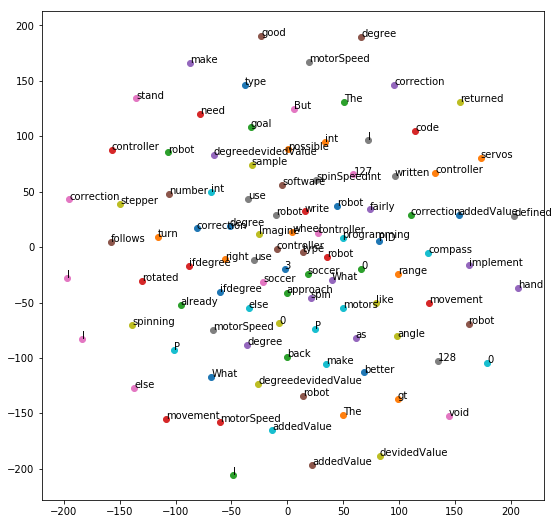

In [47]:
tsne = TSNE()
tsne_embedding_space = tsne.fit_transform(final_embedding_space[:100])

pylab.figure(figsize=(9, 9))

for i in range(len(tsne_embedding_space)):
    x, y = tsne_embedding_space[i, :]
    pylab.scatter(x, y)
    pylab.annotate(robotics_x[i], xy=(x, y))

pylab.show()